In [1]:
import sys
import os
project_path = "/home/lixiangyu/multi-omics/MOMG"
sys.path.append(project_path)
from package import  DMG, clustering, mclust_R

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


cpu


In [2]:
import scanpy as sc
adata_file='/home/lixiangyu/DMG/DMG-main/input/scMultiSim/scMultiSim1/scMultiSim1_adata.h5ad'
adata=sc.read(adata_file)
print(adata)

AnnData object with n_obs × n_vars = 1000 × 1250
    obs: 'Ground_Truth', 'array_row', 'array_col', 'mclust', 'SpatialGlue', 'ATAC', 'RNA', 'no_image', 'MISO_4', 'MISO_4_image', 'image'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'ATAC_colors', 'Ground_Truth_colors', 'MISO_4_colors', 'MISO_4_image_colors', 'RNA_colors', 'SpatialGlue_colors', 'adj_spatial', 'hvg', 'image_colors', 'log1p', 'neighbors', 'no_image_colors', 'umap'
    obsm: 'SpatialGlue', 'SpatialGlue_pca', 'X_umap', 'adj_feature', 'feat', 'spatial'
    obsp: 'connectivities', 'distances'


/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 1000 × 3750
    obs: 'Ground_Truth', 'array_row', 'array_col'
    obsm: 'spatial'


/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


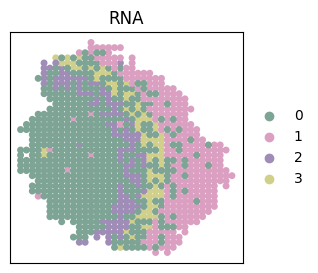

In [ ]:
# Leiden画RNA单模态聚类图
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
sc.settings.seed = 0
# 加载数据
file_fold = '/home/lixiangyu/DMG/DMG-main/input/scMultiSim/scMultiSim1/'
adata_omics1 = sc.read_h5ad(file_fold + 'adata_atac.h5ad')
print(adata_omics1)

sc.pp.pca(adata_omics1)
sc.pp.neighbors(adata_omics1)
sc.tl.umap(adata_omics1)
sc.tl.leiden(adata_omics1, resolution=0.005)

custom_colors = [
    '#7da494',  # Gold
    '#dba0c1',  # BlueViolet
    '#9f8db8',  # qianzi
    '#d0d08a',  # Blue
    '#abc8e5',  # molv
    '#e5a79a',  # tufen
]
adata_omics1.uns['leiden_colors'] = custom_colors

import matplotlib.pyplot as plt
output_path = '/home/lixiangyu/multi-omics/MOMG/input/scMultiSim_no_noise/scMultiSim1/ATAC.png'
fig, ax = plt.subplots(figsize=(3, 3))
sc.pl.embedding(adata_omics1, basis='spatial', color='leiden', ax=ax, title='ATAC', s=100, show=False)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.savefig(output_path, format='png')  
plt.show()


In [8]:
adata.obs['ATAC']=adata_omics1.obs['leiden']

AnnData object with n_obs × n_vars = 1000 × 1250
    obs: 'Ground_Truth', 'array_row', 'array_col'
    obsm: 'spatial'


/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


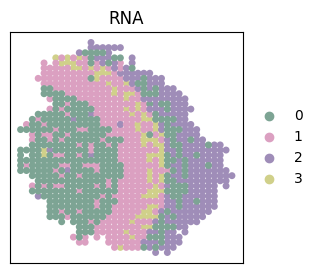

In [10]:
# Leiden画RNA单模态聚类图
import scanpy as sc
import matplotlib.pyplot as plt
np.random.seed(0)
sc.settings.seed = 0
# 加载数据
file_fold = '/home/lixiangyu/DMG/DMG-main/input/scMultiSim/scMultiSim1/'
adata_omics1 = sc.read_h5ad(file_fold + 'adata_rna.h5ad')
print(adata_omics1)

sc.pp.pca(adata_omics1)
sc.pp.neighbors(adata_omics1)
sc.tl.umap(adata_omics1)
sc.tl.leiden(adata_omics1, resolution=0.06)

custom_colors = [
    '#7da494',  # Gold
    '#dba0c1',  # BlueViolet
    '#9f8db8',  # qianzi
    '#d0d08a',  # Blue
    '#abc8e5',  # molv
    '#e5a79a',  # tufen
]
adata_omics1.uns['leiden_colors'] = custom_colors

import matplotlib.pyplot as plt
output_path = '/home/lixiangyu/multi-omics/MOMG/input/scMultiSim_no_noise/scMultiSim1/RNA.png'
fig, ax = plt.subplots(figsize=(3, 3))
sc.pl.embedding(adata_omics1, basis='spatial', color='leiden', ax=ax, title='RNA', s=100, show=False)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.savefig(output_path, format='png')  
plt.show()


In [11]:
adata.obs['RNA']=adata_omics1.obs['leiden']

In [12]:
adata.write(adata_file)

In [1]:
import scanpy as sc
adata_file='/home/lixiangyu/DMG/DMG-main/input/scMultiSim/scMultiSim1/scMultiSim1_adata.h5ad'
adata=sc.read(adata_file)
print(adata)

AnnData object with n_obs × n_vars = 1000 × 1250
    obs: 'Ground_Truth', 'array_row', 'array_col', 'mclust', 'SpatialGlue', 'ATAC', 'RNA', 'no_image', 'MISO_4', 'MISO_4_image', 'image', 'HE'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'ATAC_colors', 'Ground_Truth_colors', 'HE_colors', 'MISO_4_colors', 'MISO_4_image_colors', 'RNA_colors', 'SpatialGlue_colors', 'adj_spatial', 'hvg', 'image_colors', 'log1p', 'neighbors', 'no_image_colors', 'umap'
    obsm: 'SpatialGlue', 'SpatialGlue_pca', 'X_umap', 'adj_feature', 'feat', 'spatial'
    obsp: 'connectivities', 'distances'


/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [10]:
import pandas as pd
file_fold = "/home/lixiangyu/multi-omics/MOMG/input/scMultiSim/"
#cluster = pd.read_csv('/home/lixiangyu/multi-omics/MOMG/benchmark/scMultiSim/output_dmg/no_noise/scMultiSim1/scMultiSim1_1.0_0.7_1.0_10_mclust_DMG_label.csv')
cluster = pd.read_csv('/home/lixiangyu/DMG/DMG-main/output_dmg/scMultiSim1/scMultiSim1_0.8_0.5_0.9_20_mclust_DMG_label.csv')
adata.obs['no_image'] = cluster['mclust'].values
print(adata)
adata.write(adata_file)

AnnData object with n_obs × n_vars = 1000 × 1250
    obs: 'Ground_Truth', 'array_row', 'array_col', 'mclust', 'SpatialGlue', 'ATAC', 'RNA', 'no_image', 'MISO_4', 'MISO_4_image', 'image'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'ATAC_colors', 'Ground_Truth_colors', 'MISO_4_colors', 'MISO_4_image_colors', 'RNA_colors', 'SpatialGlue_colors', 'adj_spatial', 'hvg', 'image_colors', 'log1p', 'neighbors', 'no_image_colors', 'umap'
    obsm: 'SpatialGlue', 'SpatialGlue_pca', 'X_umap', 'adj_feature', 'feat', 'spatial'
    obsp: 'connectivities', 'distances'


In [7]:
import pandas as pd
file_fold = "/home/lixiangyu/multi-omics/MOMG/input/scMultiSim/"
cluster = pd.read_csv('/home/lixiangyu/multi-omics/MOMG/benchmark/scMultiSim/output_dmg/scMultiSim1/resnet_scMultiSim1_none_0.5_0.5_0.9_10_mclust_DMG_label.csv')
adata.obs['image'] = cluster['mclust'].values
print(adata)
adata.write(adata_file)

AnnData object with n_obs × n_vars = 1000 × 1250
    obs: 'Ground_Truth', 'array_row', 'array_col', 'mclust', 'SpatialGlue', 'ATAC', 'RNA', 'no_image', 'MISO_4', 'MISO_4_image', 'image'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'ATAC_colors', 'Ground_Truth_colors', 'MISO_4_colors', 'RNA_colors', 'SpatialGlue_colors', 'adj_spatial', 'hvg', 'log1p', 'neighbors', 'no_image_colors', 'umap'
    obsm: 'SpatialGlue', 'SpatialGlue_pca', 'X_umap', 'adj_feature', 'feat', 'spatial'
    obsp: 'connectivities', 'distances'


In [11]:
import scanpy as sc
adata=sc.read(adata_file)
custom_colors = [
    
    '#8F9D27',
    '#40AE91',
    '#D6608A',
    '#E8A16D',
    '#D0D1CD',
      
    '#49A836', 
    '#957EB2',  
    '#4D5BA0',  
    '#23A9AD', 
    '#DD5D6A',
    '#E17065',
    '#669999',
]

adata.uns['Ground_Truth_colors'] = custom_colors
adata.uns['SpatialGlue_colors'] = custom_colors
adata.uns['RNA_colors'] = custom_colors
adata.uns['ATAC_colors'] = custom_colors
adata.uns['MISO_4_colors'] = custom_colors
adata.uns['MISO_4_image_colors'] = custom_colors
adata.uns['no_image_colors'] = custom_colors
adata.uns['image_colors'] = custom_colors
# adata.write(adata_file)

In [12]:
adata.obs['SpatialGlue'] = adata.obs['SpatialGlue'].astype('category')
adata.obs['MISO_4'] = adata.obs['MISO_4'].astype('category')
adata.obs['MISO_4_image'] = adata.obs['MISO_4_image'].astype('category')
adata.obs['no_image'] = adata.obs['no_image'].astype('category')
adata.obs['image'] = adata.obs['image'].astype('category')
adata.obs['RNA'] = adata.obs['RNA'].astype('category')
adata.obs['ATAC'] = adata.obs['ATAC'].astype('category')
adata.obs['Ground_Truth'] = adata.obs['Ground_Truth'].astype('category')
# adata.write(adata_file)

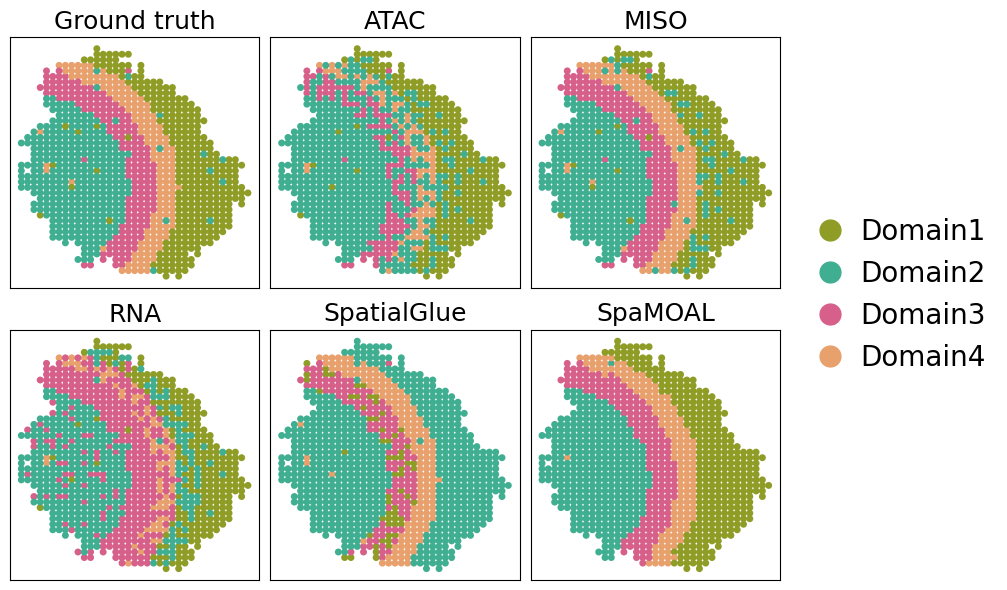

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import matplotlib.lines as mlines
import warnings
from matplotlib.lines import Line2D  # 用于创建自定义图例元素
warnings.filterwarnings('ignore')

plt.rcParams['font.size'] = 10
fig, ax_list = plt.subplots(2,3, figsize=(8,6))  #(7, 4)
s_size = 100
sc.pl.embedding(adata, basis='spatial', color='Ground_Truth',title='Ground truth', ax=ax_list[0,0],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='RNA',title='RNA', ax=ax_list[1,0],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='ATAC',title='ATAC', ax=ax_list[0,1],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='SpatialGlue', ax=ax_list[1,1],s=s_size, show=False)
color_map= {
    0: '#40AE91',
    1: '#8F9D27',
    2: '#D6608A',
    3: '#E8A16D',
    }
sc.pl.embedding(adata, basis='spatial', color='MISO_4',palette=color_map,title='MISO', ax=ax_list[0,2],s=s_size, show=False)
color_map= {
    1: '#E8A16D',
    2: '#8F9D27',
    3: '#D6608A',
    4: '#40AE91',
    }
sc.pl.embedding(adata, basis='spatial', color='no_image', palette=color_map,title='SpaMOAL', ax=ax_list[1,2], s=s_size, show=False)
# 设置子图属性
for row in ax_list:
    for ax in row:
        ax.set_title(ax.get_title(), fontsize=18)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # 移除现有图例
        legend = ax.get_legend()
        if legend is not None:
            legend.remove()
            
        # ax.invert_yaxis()
# 自定义图例映射
custom_legend = {
        
   'Domain1' :'#8F9D27',
    'Domain2':'#40AE91',
   'Domain3' :'#D6608A',
   'Domain4' :'#E8A16D', 
}

# 创建图例句柄
legend_elements = [
    mlines.Line2D(
        [], [], 
        color=color, 
        marker='o', 
        linestyle='None',
        markersize=15,
        label=label
    )
    for label, color in custom_legend.items()
]

# 在右侧添加图例
fig.legend(
    handles=legend_elements,  # 使用正确的变量名
    loc='center right',
    bbox_to_anchor=(1.27, 0.5),
    frameon=False,
    # title='Cell Types',
    title_fontsize=12,
    fontsize=20,
    ncol=1,
    handletextpad=0.1
)

# # 在右下角子图位置添加图例
# ax_list[1, 3].legend(
#     handles=legend_elements,
#     loc='center',
#     fontsize=25,
#     frameon=False,
#     ncol=1,
#     handletextpad=0.1
# )
# ax_list[1, 3].set_frame_on(False)  # 去除子图边框

plt.tight_layout(w_pad=0.8)
file_fold = '/home/lixiangyu/multi-omics/MOMG/input/scMultiSim_no_noise/scMultiSim1/'
plt.savefig(file_fold + 'cluster_all.png',format='png',bbox_inches='tight' )
plt.show()

In [20]:
import pandas as pd
import scanpy as sc

list_RNA = ['2','0','1','3']
adata.obs['RNA']  = pd.Categorical(adata.obs['RNA'], 
                      categories=list_RNA,
                      ordered=True) 
list_ATAC = ['1','0','2','3']
adata.obs['ATAC']  = pd.Categorical(adata.obs['ATAC'], 
                      categories=list_ATAC,
                      ordered=True)                       
list_MISO_4 = [1,0,2,3]
adata.obs['MISO_4']  = pd.Categorical(adata.obs['MISO_4'], 
                      categories=list_MISO_4,
                      ordered=True)                      
list_SpatialGlue = [2,1,3,4]
adata.obs['SpatialGlue']  = pd.Categorical(adata.obs['SpatialGlue'], 
                      categories=list_SpatialGlue,
                      ordered=True)
list_no_image = [4,1,3,2]
adata.obs['no_image']  = pd.Categorical(adata.obs['no_image'], 
                      categories=list_no_image,
                      ordered=True)        


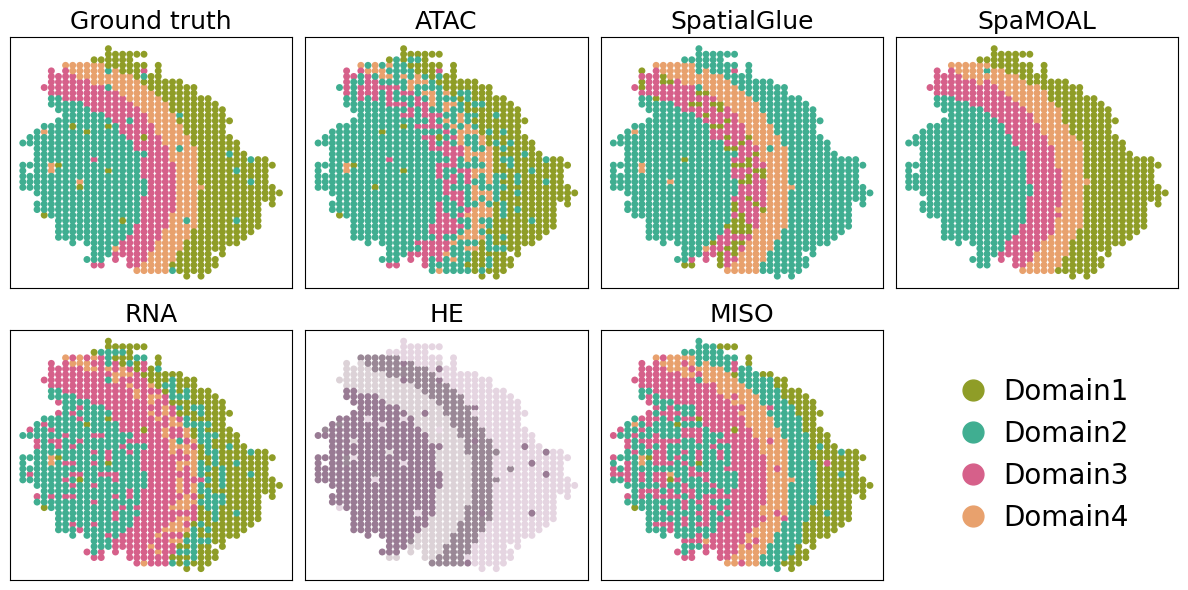

In [14]:
####加图像
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import warnings
import matplotlib.lines as mlines
from matplotlib.lines import Line2D  # 用于创建自定义图例元素

warnings.filterwarnings('ignore')

plt.rcParams['font.size'] = 10
fig, ax_list = plt.subplots(2,4, figsize=(12,6))  #(7, 4)
s_size = 100
sc.pl.embedding(adata, basis='spatial', color='Ground_Truth',title='Ground truth', ax=ax_list[0,0],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='RNA',title='RNA', ax=ax_list[1,0],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='ATAC',title='ATAC', ax=ax_list[0,1],s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='HE',title='HE', ax=ax_list[1,1], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='SpatialGlue', ax=ax_list[0,2],s=s_size, show=False)
color_map= {
    0: '#8F9D27',
    1: '#E8A16D',
    2: '#40AE91',
    3: '#D6608A',
    }
sc.pl.embedding(adata, basis='spatial', color='MISO_4_image',palette=color_map,title='MISO', ax=ax_list[1,2],s=s_size, show=False)
color_map= {
    1: '#E8A16D',
    2: '#8F9D27',
    3: '#D6608A',
    4: '#40AE91',
    }
sc.pl.embedding(adata, basis='spatial', color='image',palette=color_map, title='SpaMOAL', ax=ax_list[0,3], s=s_size, show=False)
# 清除 ax_list[1, 3] 上的原始内容并设置为图例区域
ax_list[1, 3].clear()

# 设置子图属性
for row in ax_list:
    for ax in row:
        ax.set_title(ax.get_title(), fontsize=18)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # 移除现有图例
        legend = ax.get_legend()
        if legend is not None:
            legend.remove()
            
        # ax.invert_yaxis()


# 自定义图例映射
custom_legend = {
        
   'Domain1' :'#8F9D27',
    'Domain2':'#40AE91',
   'Domain3' :'#D6608A',
   'Domain4' :'#E8A16D', 
}

# 创建图例句柄
legend_elements = [
    mlines.Line2D(
        [], [], 
        color=color, 
        marker='o', 
        linestyle='None',
        markersize=15,
        label=label
    )
    for label, color in custom_legend.items()
]

# # 在右侧添加图例
# fig.legend(
#     handles=legend_elements,  # 使用正确的变量名
#     loc='center right',
#     bbox_to_anchor=(1.2, 0.5),
#     frameon=False,
#     title='Cell Types',
#     title_fontsize=12,
#     fontsize=10,
#     ncol=1
# )

# 在右下角子图位置添加图例
ax_list[1, 3].legend(
    handles=legend_elements,
    loc='center',
    fontsize=20,
    frameon=False,
    ncol=1,
    handletextpad=0.1
)
ax_list[1, 3].set_frame_on(False)  # 去除子图边框


plt.tight_layout(w_pad=0.8)  # 增加子图间距
file_fold = '/home/lixiangyu/multi-omics/MOMG/input/scMultiSim_no_noise/scMultiSim1/'
plt.savefig(file_fold + 'cluster_all_image.png',format='png',bbox_inches='tight')
plt.show()

In [29]:
import pandas as pd
import scanpy as sc

list_RNA = ['2','0','1','3']
adata.obs['RNA']  = pd.Categorical(adata.obs['RNA'], 
                      categories=list_RNA,
                      ordered=True) 
list_ATAC = ['1','0','2','3']
adata.obs['ATAC']  = pd.Categorical(adata.obs['ATAC'], 
                      categories=list_ATAC,
                      ordered=True)                       
list_MISO_4 = [1,0,2,3]
adata.obs['MISO_4_image']  = pd.Categorical(adata.obs['MISO_4_image'], 
                      categories=list_MISO_4,
                      ordered=True)                      
list_SpatialGlue = [2,1,3,4]
adata.obs['SpatialGlue']  = pd.Categorical(adata.obs['SpatialGlue'], 
                      categories=list_SpatialGlue,
                      ordered=True)
list_no_image = [4,1,3,2]
adata.obs['image']  = pd.Categorical(adata.obs['image'], 
                      categories=list_no_image,
                      ordered=True)        


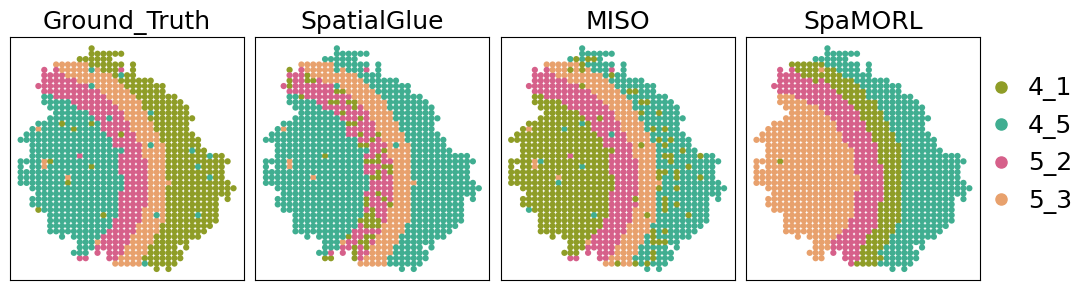

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import warnings
from matplotlib.lines import Line2D  # 用于创建自定义图例元素

warnings.filterwarnings('ignore')

# 假设 adata 已正确加载
# adata = sc.read(adata_file)

plt.rcParams['font.size'] = 10
fig, ax_list = plt.subplots(1, 4, figsize=(10, 3))  # 扩大宽度以容纳右侧图例
s_size = 80

# 绘制子图
sc.pl.embedding(adata, basis='spatial', color='Ground_Truth', title='Ground_Truth', ax=ax_list[0], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='SpatialGlue', title='SpatialGlue', ax=ax_list[1], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='MISO_4', title='MISO', ax=ax_list[2], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='no_image', title='SpaMORL', ax=ax_list[3], s=s_size, show=False)

# 移除各子图的原始图例
for ax in ax_list:
    ax.set_title(ax.get_title(), fontsize=18)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if ax.legend_:
        ax.legend_.remove()

# 自定义图例映射
custom_legend = {
        
   '4_1' :'#8F9D27',
    '4_5':'#40AE91',
   '5_2' :'#D6608A',
   '5_3' :'#E8A16D', 
}

# 创建带小圆点的自定义图例元素
legend_elements = [
    Line2D(
        [], [], 
        color=color, 
        marker='o', 
        linestyle='None',
        markersize=8,  # 标记点大小
        label=label
    )
    for label, color in custom_legend.items()
]

# 在右侧添加自定义图例
fig.legend(
    handles=legend_elements,  # 使用自定义图例元素
    labels=list(custom_legend.keys()),  # 使用自定义标签
    loc='center right',
    bbox_to_anchor=(1.1, 0.5),  # 调整图例位置
    frameon=False,
    fontsize=18,
    ncol=1 ,
    handletextpad=0.1
)

plt.tight_layout(w_pad=0.8)  # 增加子图间距
file_fold = '/home/lixiangyu/multi-omics/MOMG/input/scMultiSim_no_noise/scMultiSim1/'
plt.savefig(file_fold + 'cluster_one_row.png', format='png', bbox_inches='tight')
plt.show()

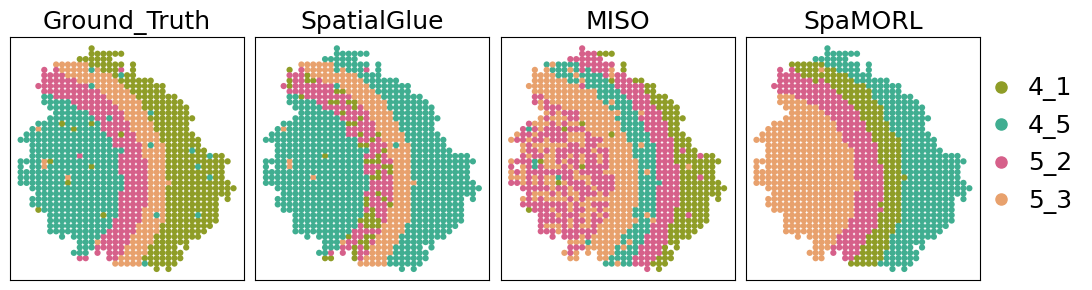

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import warnings
from matplotlib.lines import Line2D  # 用于创建自定义图例元素

warnings.filterwarnings('ignore')

# 假设 adata 已正确加载
# adata = sc.read(adata_file)

plt.rcParams['font.size'] = 10
fig, ax_list = plt.subplots(1, 4, figsize=(10, 3))  # 扩大宽度以容纳右侧图例
s_size = 80

# 绘制子图
sc.pl.embedding(adata, basis='spatial', color='Ground_Truth', title='Ground_Truth', ax=ax_list[0], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='SpatialGlue', title='SpatialGlue', ax=ax_list[1], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='MISO_4_image', title='MISO', ax=ax_list[2], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial', color='image', title='SpaMORL', ax=ax_list[3], s=s_size, show=False)

# 移除各子图的原始图例
for ax in ax_list:
    ax.set_title(ax.get_title(), fontsize=18)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if ax.legend_:
        ax.legend_.remove()

# 自定义图例映射
custom_legend = {
        
   '4_1' :'#8F9D27',
    '4_5':'#40AE91',
   '5_2' :'#D6608A',
   '5_3' :'#E8A16D', 
}

# 创建带小圆点的自定义图例元素
legend_elements = [
    Line2D(
        [], [], 
        color=color, 
        marker='o', 
        linestyle='None',
        markersize=8,  # 标记点大小
        label=label
    )
    for label, color in custom_legend.items()
]

# 在右侧添加自定义图例
fig.legend(
    handles=legend_elements,  # 使用自定义图例元素
    labels=list(custom_legend.keys()),  # 使用自定义标签
    loc='center right',
    bbox_to_anchor=(1.1, 0.5),  # 调整图例位置
    frameon=False,
    fontsize=18,
    ncol=1 ,
    handletextpad=0.1
)

plt.tight_layout(w_pad=0.8)  # 增加子图间距
file_fold = '/home/lixiangyu/multi-omics/MOMG/input/scMultiSim_no_noise/scMultiSim1/'
plt.savefig(file_fold + 'cluster_image.png', format='png', bbox_inches='tight')
plt.show()

In [35]:
import pandas as pd
import scanpy as sc

list_RNA = ['2','0','1','3']
adata.obs['RNA']  = pd.Categorical(adata.obs['RNA'], 
                      categories=list_RNA,
                      ordered=True) 
list_ATAC = ['1','0','2','3']
adata.obs['ATAC']  = pd.Categorical(adata.obs['ATAC'], 
                      categories=list_ATAC,
                      ordered=True)                       
list_MISO_4 = [1,0,2,3]
adata.obs['MISO_4']  = pd.Categorical(adata.obs['MISO_4'], 
                      categories=list_MISO_4,
                      ordered=True)                      
list_SpatialGlue = [2,1,3,4]
adata.obs['SpatialGlue']  = pd.Categorical(adata.obs['SpatialGlue'], 
                      categories=list_SpatialGlue,
                      ordered=True)
list_no_image = [1,2,4,3]
adata.obs['no_image']  = pd.Categorical(adata.obs['no_image'], 
                      categories=list_no_image,
                      ordered=True)        

# adata.write(adata_file)

In [15]:
import numpy as np
import scanpy as sc
import pandas as pd
from sklearn.metrics import (
    adjusted_mutual_info_score as AMI,
    normalized_mutual_info_score as NMI,
    adjusted_rand_score as ARI,
    homogeneity_score,
    v_measure_score,
    mutual_info_score
)


adata = sc.read(adata_file)
# 假设 adata 和 adata2 是已经加载的 AnnData 对象
#adata.obs['annotation'], _ = pd.factorize(adata.obs['ground_truth'])

true_labels = adata.obs['Ground_Truth'].values  # 获取真实标签

# 初始化一个字典来存储所有指标的结果
metrics_results = {}
predicted_labels = adata.obs[f'no_image'].values  # 获取聚类结果
    
# 计算各项指标
ami = AMI(true_labels, predicted_labels)
nmi = NMI(true_labels, predicted_labels)
ari = ARI(true_labels, predicted_labels)
homogeneity = homogeneity_score(true_labels, predicted_labels)
v_measure = v_measure_score(true_labels, predicted_labels)
mutual_info = mutual_info_score(true_labels, predicted_labels)

# 将结果存储到字典中
metrics_results[f'result'] = {
    'AMI': ami,
    'NMI': nmi,
    'ARI': ari,
    'Homogeneity': homogeneity,
    'V-measure': v_measure,
    'Mutual Information': mutual_info
}
    

# 打印或返回结果
for cluster_result, metrics in metrics_results.items():
    for metric_name, value in metrics.items():
        print(f"{value:.4f},",end=" ")
    print()  # 打印一个空行以分隔不同的聚类结果

0.8279, 0.8285, 0.8806, 0.8273, 0.8285, 1.1059, 


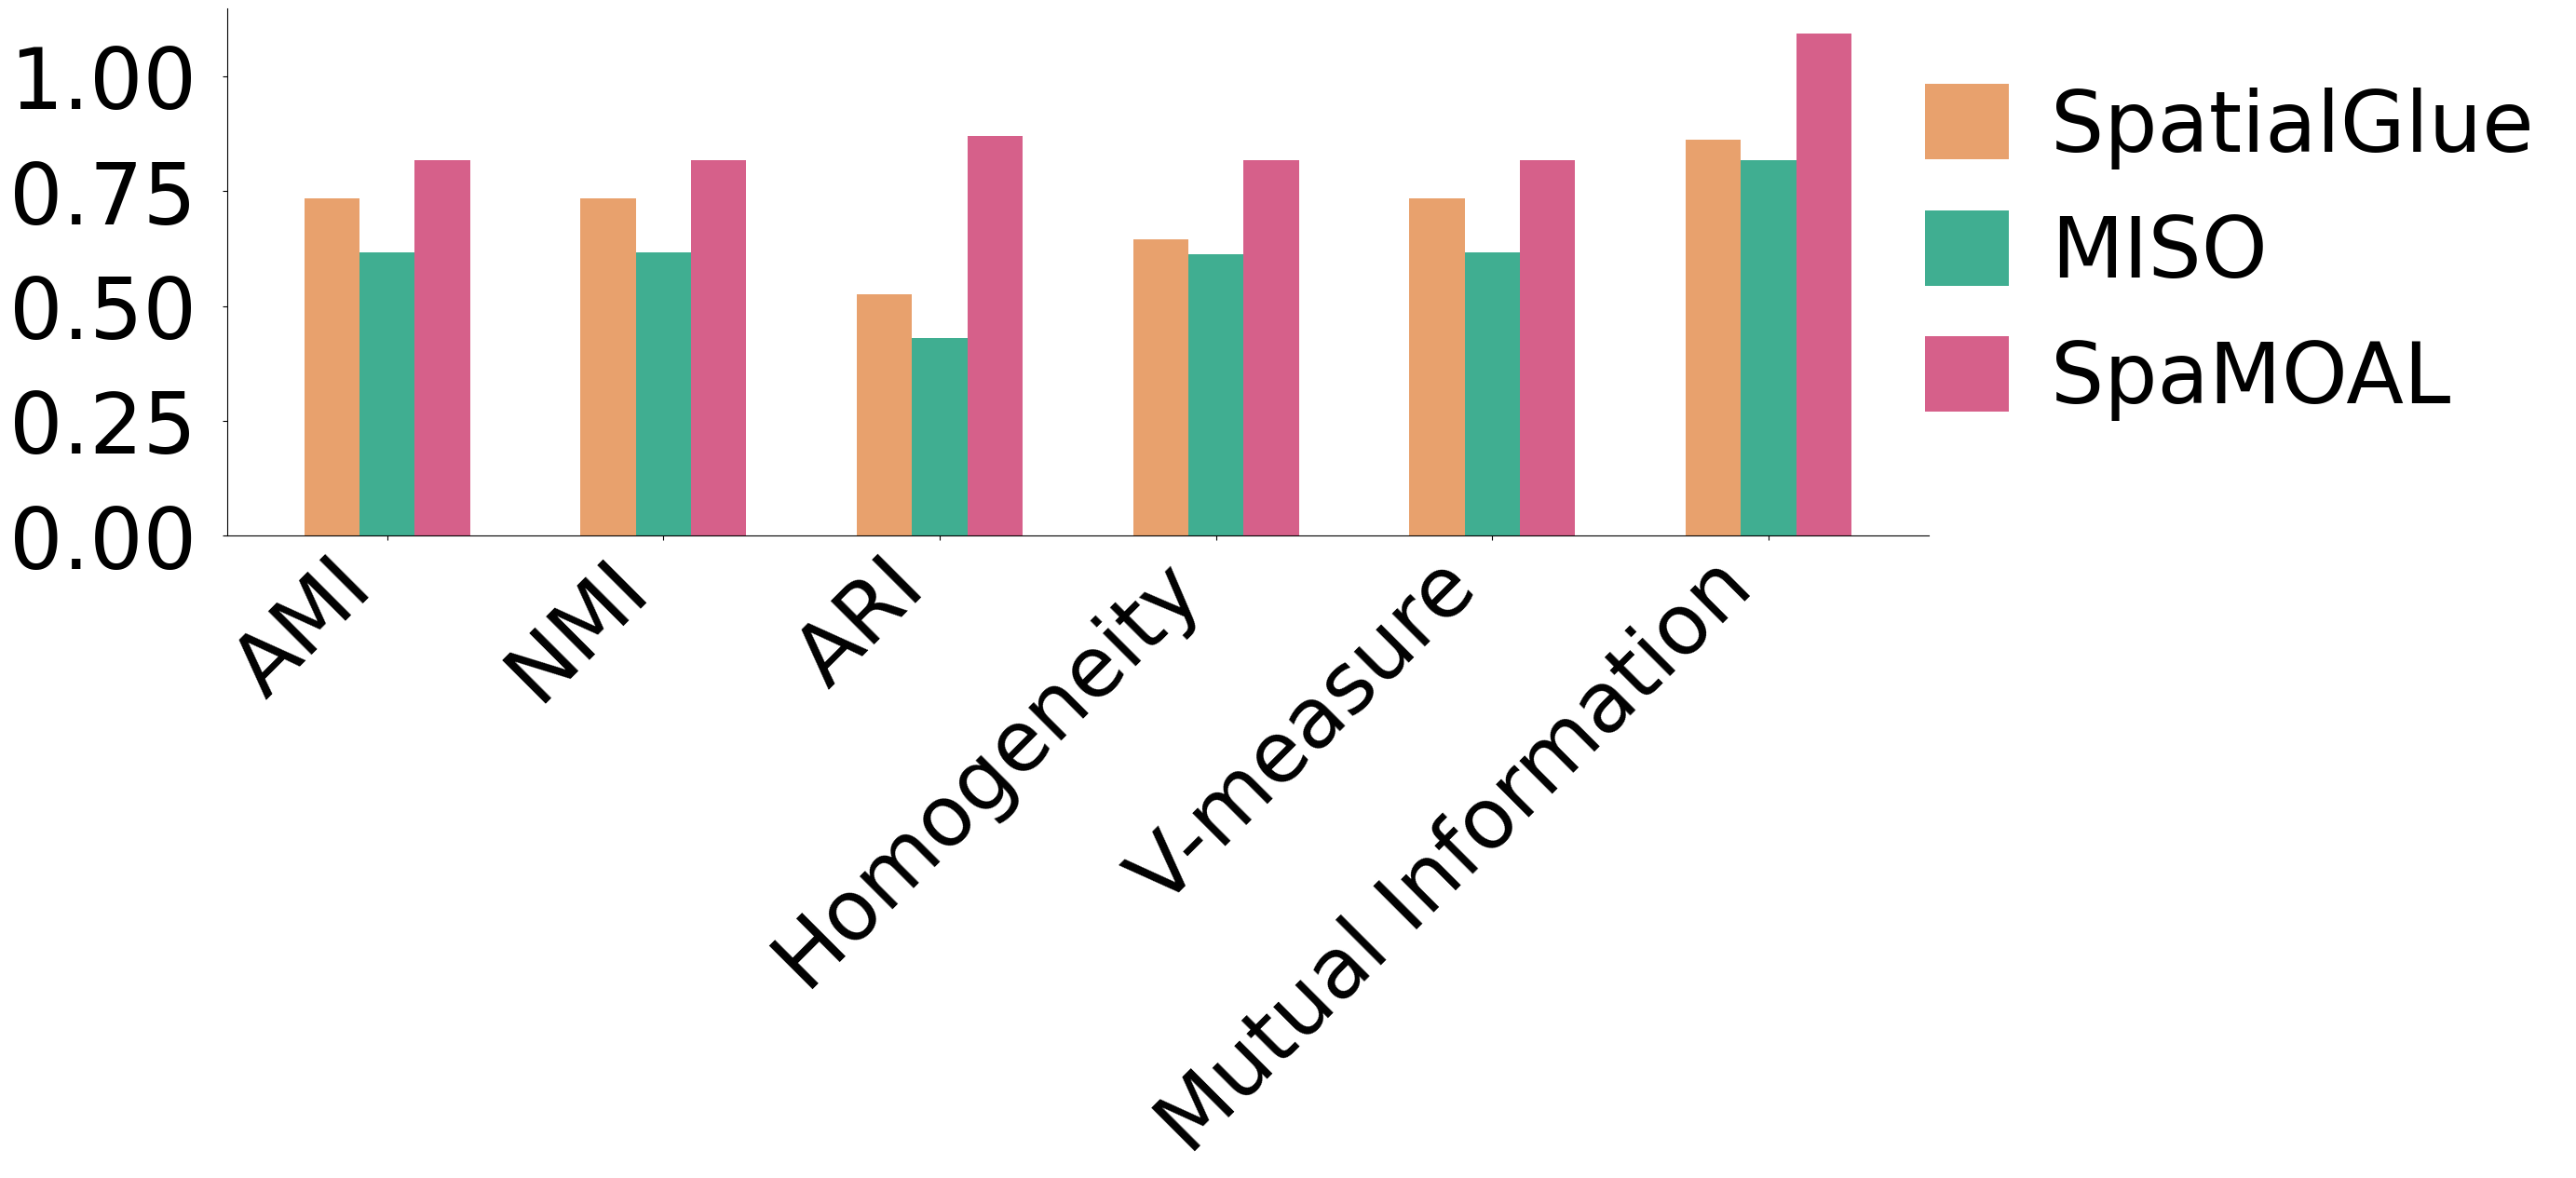

In [41]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
# 定义数据
labels = ['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information']
methods = ['SpatialGlue', 'MISO', 'SpaMOAL']
data = {
    'SpatialGlue': [0.7335, 0.7346, 0.5260, 0.6444, 0.7346, 0.8614],
    'MISO': [0.6163, 0.6176, 0.4292, 0.6118, 0.6176, 0.8178],
    'SpaMOAL': [0.8168, 0.8175, 0.8697, 0.8179, 0.8175, 1.0933],
}

# 设置图形大小
fig, ax = plt.subplots(figsize=(30, 13))
plt.rcParams['font.size'] = 18
# 设置条形宽度
bar_width = 0.2
index = np.arange(len(labels))

# 定义颜色列表
colors = ['#E8A16D', '#40AE91', '#D6608A']

# 绘制条形图，并指定颜色
for i, method in enumerate(methods):
    ax.bar(index + i * bar_width, data[method], bar_width, label=method, color=colors[i])

# 设置图例，调整标记为正方形
legend = ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1), borderaxespad=0.5, fontsize=65, 
          frameon=False, handlelength=1, handleheight=1, handletextpad=0.5)
# 获取图例的字体属性
legend_text = legend.get_texts()[0]
legend_font = legend_text.get_fontproperties()

# 提取字体属性（不包括大小）
font_family = legend_font.get_family()


ax.set_xticks(index + bar_width * (len(methods) - 1) / 2)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=65,family=font_family)

ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
plt.yticks(fontsize=65)
ax.tick_params(axis='y', pad=20)

# 隐藏顶部和右侧的边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 显示图形
plt.tight_layout()
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/scMultiSim_no_noise/scMultiSim1/metrics_image.png', format='png')

plt.show()

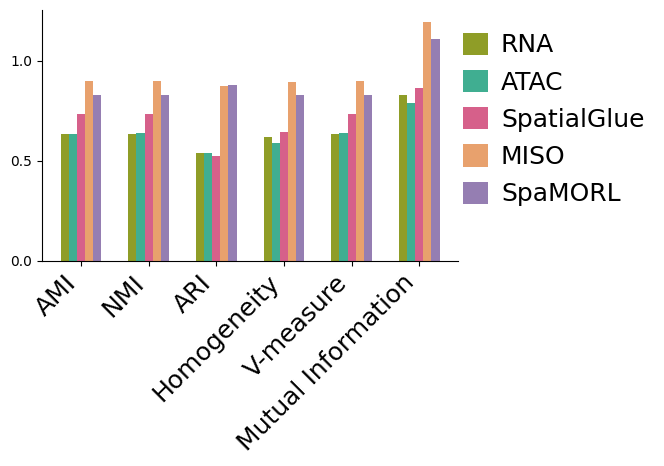

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# 定义数据
labels = ['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information']
methods = ['RNA','ATAC','SpatialGlue', 'MISO', 'SpaMORL']
data = {
    'RNA':[0.6347, 0.6360, 0.5395, 0.6198, 0.6360, 0.8284],
    'ATAC':[0.6350, 0.6364, 0.5399, 0.5907, 0.6364, 0.7896],
    'SpatialGlue': [0.7335, 0.7346, 0.5260, 0.6444, 0.7346, 0.8614],
    'MISO': [0.8962, 0.8965, 0.8748, 0.8930, 0.8965, 1.1936,],
    'SpaMORL': [0.8279, 0.8285, 0.8806, 0.8273, 0.8285, 1.1059],
}

# 设置图形大小
fig, ax = plt.subplots(figsize=(8, 5))
plt.rcParams['font.size'] = 18
# 设置条形宽度
bar_width = 0.12
index = np.arange(len(labels))

# 定义颜色列表
colors = ['#8F9D27', '#40AE91', '#D6608A', '#E8A16D', '#957EB2']

# 绘制条形图，并指定颜色
for i, method in enumerate(methods):
    ax.bar(index + i * bar_width, data[method], bar_width, label=method, color=colors[i])

ax.set_xticks(index + bar_width * (len(methods) - 1) / 2)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=18)

# 设置图例，调整标记为正方形
ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1), borderaxespad=0.5, fontsize=18, 
          frameon=False, handlelength=1, handleheight=1, handletextpad=0.5)

# 隐藏顶部和右侧的边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 显示图形
plt.tight_layout()
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/scMultiSim_no_noise/scMultiSim1/metrics.png', format='png')

plt.show()

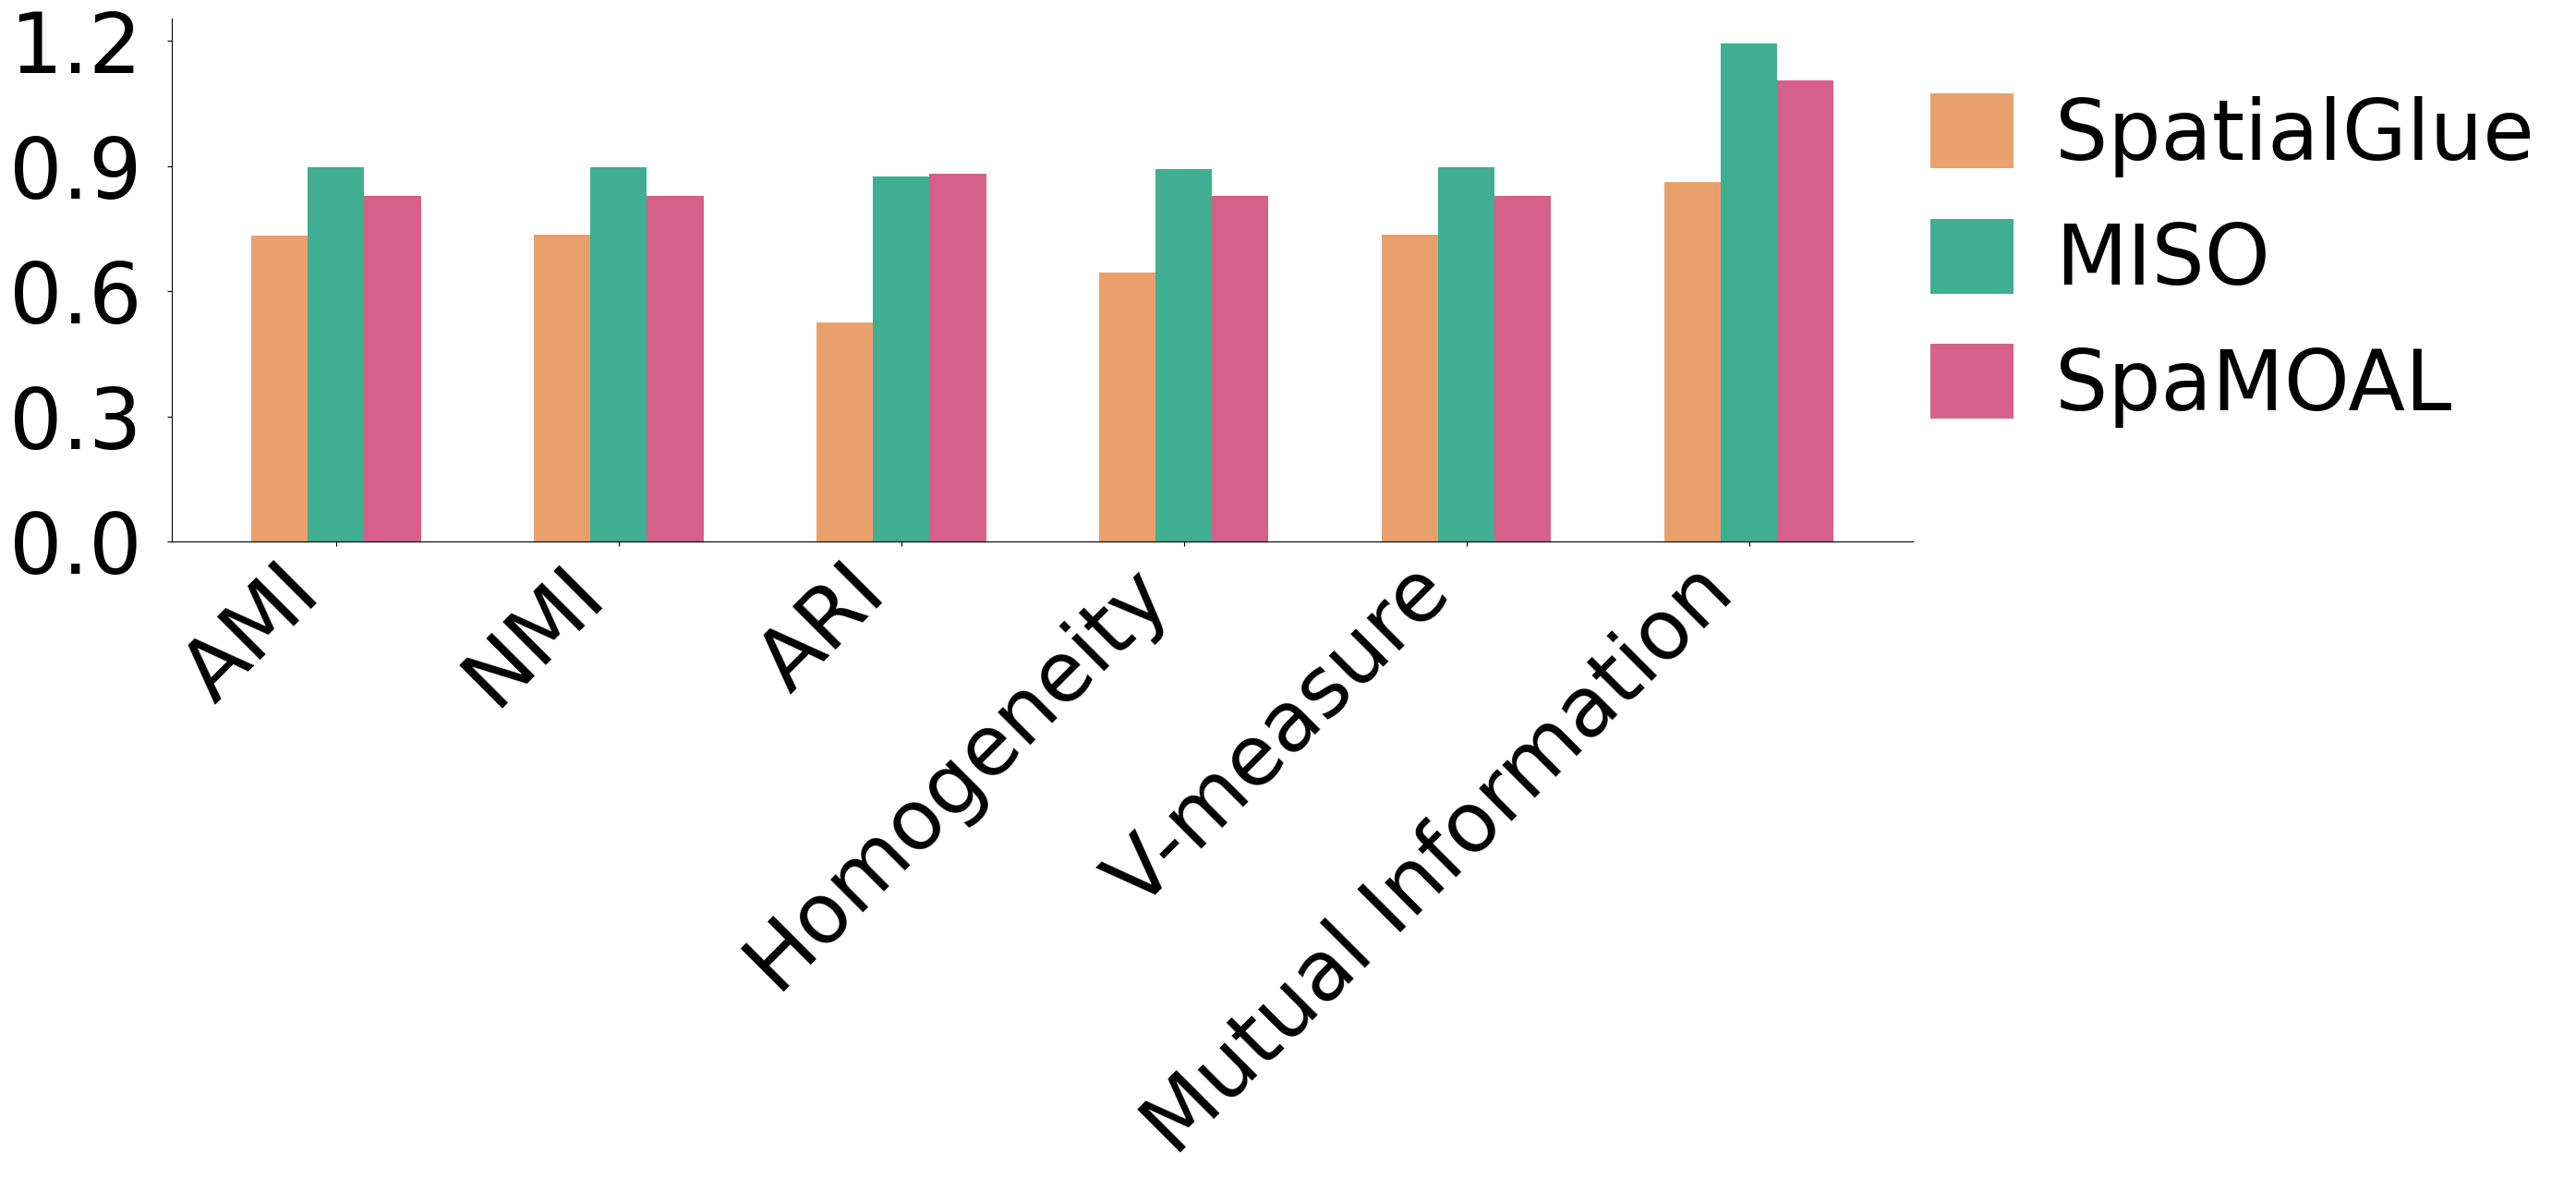

In [43]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
# 定义数据
labels = ['AMI', 'NMI', 'ARI', 'Homogeneity', 'V-measure', 'Mutual Information']
methods = ['SpatialGlue', 'MISO', 'SpaMOAL']
data = {
    'SpatialGlue': [0.7335, 0.7346, 0.5260, 0.6444, 0.7346, 0.8614],
    'MISO': [0.8962, 0.8965, 0.8748, 0.8930, 0.8965, 1.1936,],
    'SpaMOAL': [0.8279, 0.8285, 0.8806, 0.8273, 0.8285, 1.1059],
}


# 设置图形大小
fig, ax = plt.subplots(figsize=(30, 13))
plt.rcParams['font.size'] = 18
# 设置条形宽度
bar_width = 0.2
index = np.arange(len(labels))

# 定义颜色列表
colors = ['#E8A16D', '#40AE91', '#D6608A']

# 绘制条形图，并指定颜色
for i, method in enumerate(methods):
    ax.bar(index + i * bar_width, data[method], bar_width, label=method, color=colors[i])

# 设置图例，调整标记为正方形
legend = ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1), borderaxespad=0.5, fontsize=65, 
          frameon=False, handlelength=1, handleheight=1, handletextpad=0.5)
# 获取图例的字体属性
legend_text = legend.get_texts()[0]
legend_font = legend_text.get_fontproperties()

# 提取字体属性（不包括大小）
font_family = legend_font.get_family()


ax.set_xticks(index + bar_width * (len(methods) - 1) / 2)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=65,family=font_family)

ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
plt.yticks(fontsize=65)
ax.tick_params(axis='y', pad=20)

# 隐藏顶部和右侧的边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 显示图形
plt.tight_layout()
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/scMultiSim_no_noise/scMultiSim1/metrics_3.png', format='png')

plt.show()